In [2]:
# Imports

import numpy as np
import matplotlib.pyplot as plt

# Task 1

Check consistency of results with Stokes law. The mass of the silica particles is $m = \rho \frac{4\pi (D/2)^3}{3} \approx 3.013*10^{-11}$ g.

# Task 2

Chose our units to be $L=1 \mu m$, $T = 1 \mu s $, $M=1g$. This gives energy the dimensions 

$$E = ML^2/T^2 = 10^{-3} kg \cdot \frac{(10^{-6}m)^2}{(10^{-6}s)^2} = 10^{-3} J \rightarrow 1 J = 10^{3} E_{unit}$$

We thus have the values of parameters:

$$ \tau = 48.5 \rm T, 147.3 \rm T$$
$$ x(0) = 0.1 \rm L $$
$$ v(0) = 2.0 \rm \mu m/ms = 2.0\cdot 10^{-3} \rm L/T $$
$$ f_0 = 3 kHz = 3000 1/s = 3000 1/(10^6 T) = 3\cdot 10^{-3} \rm 1/T  $$
$$ Temp = 297 K$$
$$ k_B = 1.381 \cdot 10^{-23} m^2 kg/s^2T \hspace{5px} 1.381 \cdot 10^{-23} \cdot (10^{6} L)^2 \cdot 10^3 M / (10^6 T)^2Temp = 1.381 \cdot 10^{-20} ML^2/T^2Temp $$

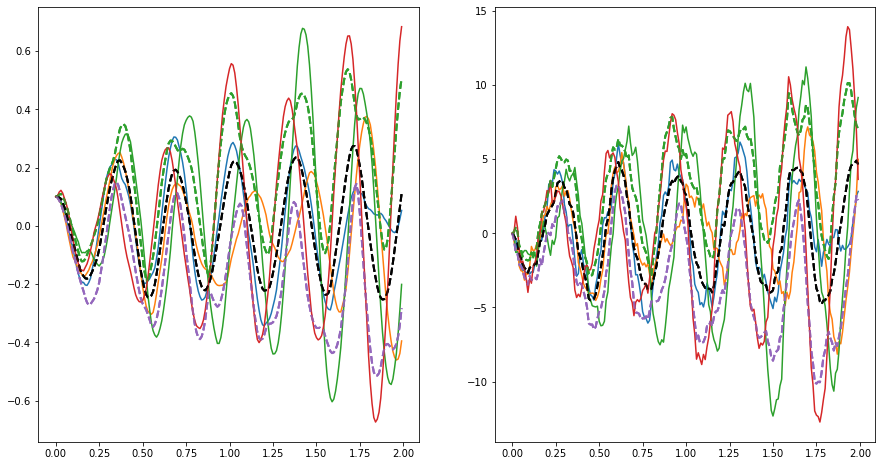

In [38]:
# Load data
pos = np.loadtxt("pos.dat")
vel = np.loadtxt("vel.dat")

fig, ax = plt.subplots(1,2,figsize=(15,8))

meanPos = np.mean(pos[:,1:], axis=1)
meanVel = np.mean(vel[:,1:], axis=1)
varPos = np.var(pos[:,1:], axis=1)
varVel = np.var(vel[:,1:], axis=1)

nwalkers = len(pos[0,1:])

for i in range(1,nwalkers):
    ax[0].plot(pos[:,0], pos[:,i])
    ax[0].plot(pos[:,0], meanPos, color='k', linestyle='--', linewidth=2, alpha=0.7)
    ax[0].plot(pos[:,0], meanPos+np.sqrt(varPos), color='C2', linestyle='--', linewidth=2, alpha=0.7)
    ax[0].plot(pos[:,0], meanPos-np.sqrt(varPos), color='C4', linestyle='--', linewidth=2, alpha=0.7)
    
    
    ax[1].plot(vel[:,0], vel[:,i])
    ax[1].plot(vel[:,0], meanVel, color='k', linestyle='--', linewidth=2, alpha=0.7)
    ax[1].plot(vel[:,0], meanVel+np.sqrt(varVel), color='C2', linestyle='--', linewidth=2, alpha=0.7)
    ax[1].plot(vel[:,0], meanVel-np.sqrt(varVel), color='C4', linestyle='--', linewidth=2, alpha=0.7)
